In [ ]:
from dglchem.utils import featurizer as fe
from dglchem.utils import featurizer_old as fo
from rdkit import Chem

mol = Chem.MolFromSmiles('COO')
feat = fe.AtomFeaturizer()
feat_old = fo.AtomFeaturizerOld()

bond = fe.BondFeaturizer()
bond_old = fo.BondFeaturizer()

assert feat(mol) is not None 
assert bond(mol) is not None
assert (feat(mol)[0] == feat_old(mol)['h'][0]).all()
assert (bond(mol)[0] == bond_old(mol)['e'][0]).all()
print('Featurizers are fine!')

#%timeit feat(mol)
#%timeit feat_old(mol)
#%timeit bond(mol)
#%timeit bond_old(mol)

In [ ]:
from dglchem.datasets import BradleyDoublePlus
data = BradleyDoublePlus()

assert data.get_splits('consecutive') is not None
print('consecutive is a success')
assert data.get_splits('random') is not None
print('random is a success')
assert data.get_splits('molecular_weight') is not None
print('molecular_weight is a success')
#assert data.get_splits('stratified') is not None
#print('stratified is a success')

In [ ]:
from dglchem.datasets import BradleyDoublePlus
from dglchem.utils.data_splitting import taylor_butina_clustering
data = BradleyDoublePlus()

clusters = taylor_butina_clustering(data)

In [ ]:
from dglchem.datasets import BradleyDoublePlus
data = BradleyDoublePlus()

data.weight_vs_target_plot()

In [ ]:
import torch
import torch.nn.functional as F
from dglchem.datasets import BradleyDoublePlus
from dglchem.utils import DataSet
from dglchem.models import MGConv
from torch_geometric.loader import DataLoader

dataset = DataSet(file_path='./data/processed/BradleyDoublePlus.pickle')
#dataset.draw_smile(0).show()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data = dataset[0].to(device)

model = MGConv(num_layers=2, node_dim=data.num_node_features, edge_dim=data.num_edge_features).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.mse_loss(out, data.y)
    print(loss.detach().numpy())
    loss.backward()
    optimizer.step()

In [ ]:
from dglchem.utils import DataSet

In [ ]:
from torch import Tensor, cat
y = Tensor([1,0,1,1])
x = Tensor([0,1,2,3])

print(cat((x,y)))

In [ ]:
%matplotlib inline
from dglchem.datasets import BradleyDoublePlus
dataset = BradleyDoublePlus()

from dglchem.utils import classify_compounds
_, num_dict = classify_compounds(dataset.smiles)
l = 0
for key in num_dict.keys():
    l+=num_dict[key]
print(f'Dataset length: {len(dataset.smiles)}', f'Dictionary length: {l}', sep='\n')
    

from dglchem.utils import compound_nums_chart
compound_nums_chart(dataset.smiles, save_fig=True)


In [ ]:
from rdkit.Chem import MolFromSmiles

def add_atom_mass_above_30(atom):
            if atom.GetMass() > 15:
                return [True]
            else:
                return [False]


from dglchem.utils import AtomFeaturizer
featurizer = AtomFeaturizer(atom_feature_list = ['atom_type_one_hot'])
featurizer_raw = AtomFeaturizer(atom_feature_list = ['atom_type_one_hot'])
featurizer.extend_features(['garbo'],[add_atom_mass_above_30])

print(featurizer(MolFromSmiles('COO')))
print(featurizer_raw(MolFromSmiles('COO')))
print(featurizer.atom_feature_list)

In [ ]:
from dglchem.datasets import BradleyDoublePlus, LogP
from dglchem.utils import compounds_dataset_heatmap

smiles1 = BradleyDoublePlus().smiles
smiles2 = LogP().smiles
compounds_dataset_heatmap([smiles1,smiles2],['BDP','LogP'],save_fig=True)

In [ ]:
import numpy as np
from dglchem.utils import loss_plot
from dglchem.utils import GraphDataSet
from dglchem.utils import train_model
from dglchem.models import MGConv
import torch.nn.functional as F
import torch

device = torch.device('cpu')
graph_data = GraphDataSet(file_path='./data/processed/BradleyDoublePlus.pickle',split=True)
model = MGConv(num_layers=2, node_dim=graph_data.num_node_features, edge_dim=graph_data.num_edge_features).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
loss = F.mse_loss

trl, tl = train_model(model, loss_func=loss, optimizer=optimizer, train_data_loader=graph_data.train,
                      test_data_loader=graph_data.test, early_stopping=False)



loss_plot([trl,tl],['train loss','test loss'])

In [ ]:
import numpy as np
from dglchem.utils import loss_plot
from dglchem.utils import GraphDataSet
from dglchem.utils import train_model
from dglchem.models import MPNNModel
import torch.nn.functional as F
import torch

device = torch.device('cpu')
graph_data = GraphDataSet(file_path='./data/processed/BradleyDoublePlus.pickle',split=True)
x = graph_data.train[0]
model = MPNNModel(node_dim=graph_data.num_node_features, edge_dim=graph_data.num_edge_features,
             num_layers=5, node_hidden_dim=64).to(device)
model(x)

In [ ]:
from dglchem.datasets import BradleyDoublePlus
data = BradleyDoublePlus()
data.draw_smile(2)

In [ ]:
from dglchem.datasets import BradleyDoublePlus
data = BradleyDoublePlus()
data.save_dataset()

In [ ]:
from dglchem.datasets import LogP
data = LogP()
data.save_dataset()

In [ ]:
from dglchem.utils import DataSet
from dglchem.datasets import BradleyDoublePlus
#data = DataSet(file_path='./data/processed/BradleyDoublePlus.pickle')
%timeit data = DataSet(file_path='./data/processed/BradleyDoublePlus.pickle')
%timeit data = BradleyDoublePlus()

In [ ]:
from dglchem.datasets import LogP
from dglchem.utils import DataSet
%timeit data = DataSet(file_path='./data/processed/LogP.pickle')
%timeit data = LogP()

In [9]:
from dglchem.datasets import BradleyDoublePlus
import pandas as pd
from rdkit.Chem import SmilesWriter, MolFromSmiles, MolToSmiles

data = BradleyDoublePlus()
data.get_mol()[:5]
print(data.smiles[10:15])

['CC(Cl)Cl', 'CC(CO)(CO)[N+](=O)[O-]', 'Clc1cccs1', 'CCCOC(=O)CC', 'C=C(C)OC(C)=O']


In [14]:
from dglchem.datasets import BradleyDoublePlus
from torch_geometric.loader import DataLoader
data = BradleyDoublePlus()

train, _, _ = data.get_splits()
train_loader = DataLoader(train, batch_size=32)
for batch in train_loader:
    print(batch.edge_attr.shape)

torch.Size([762, 12])
torch.Size([976, 12])
torch.Size([762, 12])
torch.Size([722, 12])
torch.Size([876, 12])
torch.Size([886, 12])
torch.Size([750, 12])
torch.Size([780, 12])
torch.Size([772, 12])
torch.Size([776, 12])
torch.Size([706, 12])
torch.Size([932, 12])
torch.Size([758, 12])
torch.Size([794, 12])
torch.Size([640, 12])
torch.Size([768, 12])
torch.Size([824, 12])
torch.Size([886, 12])
torch.Size([730, 12])
torch.Size([832, 12])
torch.Size([674, 12])
torch.Size([826, 12])
torch.Size([828, 12])
torch.Size([804, 12])
torch.Size([640, 12])
torch.Size([656, 12])
torch.Size([708, 12])
torch.Size([750, 12])
torch.Size([846, 12])
torch.Size([756, 12])
torch.Size([730, 12])
torch.Size([718, 12])
torch.Size([868, 12])
torch.Size([730, 12])
torch.Size([790, 12])
torch.Size([694, 12])
torch.Size([772, 12])
torch.Size([714, 12])
torch.Size([762, 12])
torch.Size([714, 12])
torch.Size([596, 12])
torch.Size([770, 12])
torch.Size([840, 12])
torch.Size([842, 12])
torch.Size([684, 12])
torch.Size

In [1]:
import json
import os
classes  = dict()
path = 'classyfire'
for file in os.listdir(path):
    file_path = os.path.join(path,file)
    try:
        class_name = json.load(open(file_path))['class']['name']
        if class_name in classes.keys():
            classes[class_name] += 1
        else:
            classes[class_name] = 1
    except:
        print('no class name in the first layer')


no class name in the first layer
no class name in the first layer
no class name in the first layer
no class name in the first layer
{'Alkyl halides': 6, 'Fatty Acyls': 13, 'Organobromides': 12, 'Organic carbonic acids and derivatives': 1, 'Naphthalenes': 2, 'Halohydrins': 4, 'Vinyl halides': 5, 'Benzene and substituted derivatives': 15, 'Carboxylic acids and derivatives': 16, 'Organooxygen compounds': 8, 'Homogeneous halogens': 1, 'Cinnamic acids and derivatives': 2, 'Acyl halides': 2, 'Organonitrogen compounds': 2, 'Triphenyl compounds': 1, 'Keto acids and derivatives': 1, 'Phenols': 2, 'Allyl-type 1,3-dipolar organic compounds': 1, 'Organochlorides': 2}


In [5]:
import json
print(json.load(open('classyfire/0.json')))

{'_id': 'GDTBXPJZTBHREO-UHFFFAOYSA-N', 'alternative_parents': [], 'ancestors': ['Chemical entities', 'Homogeneous halogens', 'Homogeneous non-metal compounds', 'Inorganic compounds'], 'class': {'chemont_id': 'CHEMONTID:0000432', 'description': 'Inorganic non-metallic compounds in which the largest atom is a nobel gas.', 'name': 'Homogeneous halogens', 'url': 'http://classyfire.wishartlab.com/tax_nodes/C0000432'}, 'classification_version': '2.1', 'description': 'This compound belongs to the class of inorganic compounds known as homogeneous halogens. These are inorganic non-metallic compounds in which the largest atom is a nobel gas.', 'direct_parent': {'chemont_id': 'CHEMONTID:0000432', 'description': 'Inorganic non-metallic compounds in which the largest atom is a nobel gas.', 'name': 'Homogeneous halogens', 'url': 'http://classyfire.wishartlab.com/tax_nodes/C0000432'}, 'external_descriptors': [{'annotations': ['diatomic bromine'], 'source': 'CHEBI', 'source_id': 'CHEBI:29224'}], 'inch

no class name in the first layer for file 41.json
no class name in the first layer for file 40.json
no class name in the first layer for file 47.json
no class name in the first layer for file 43.json


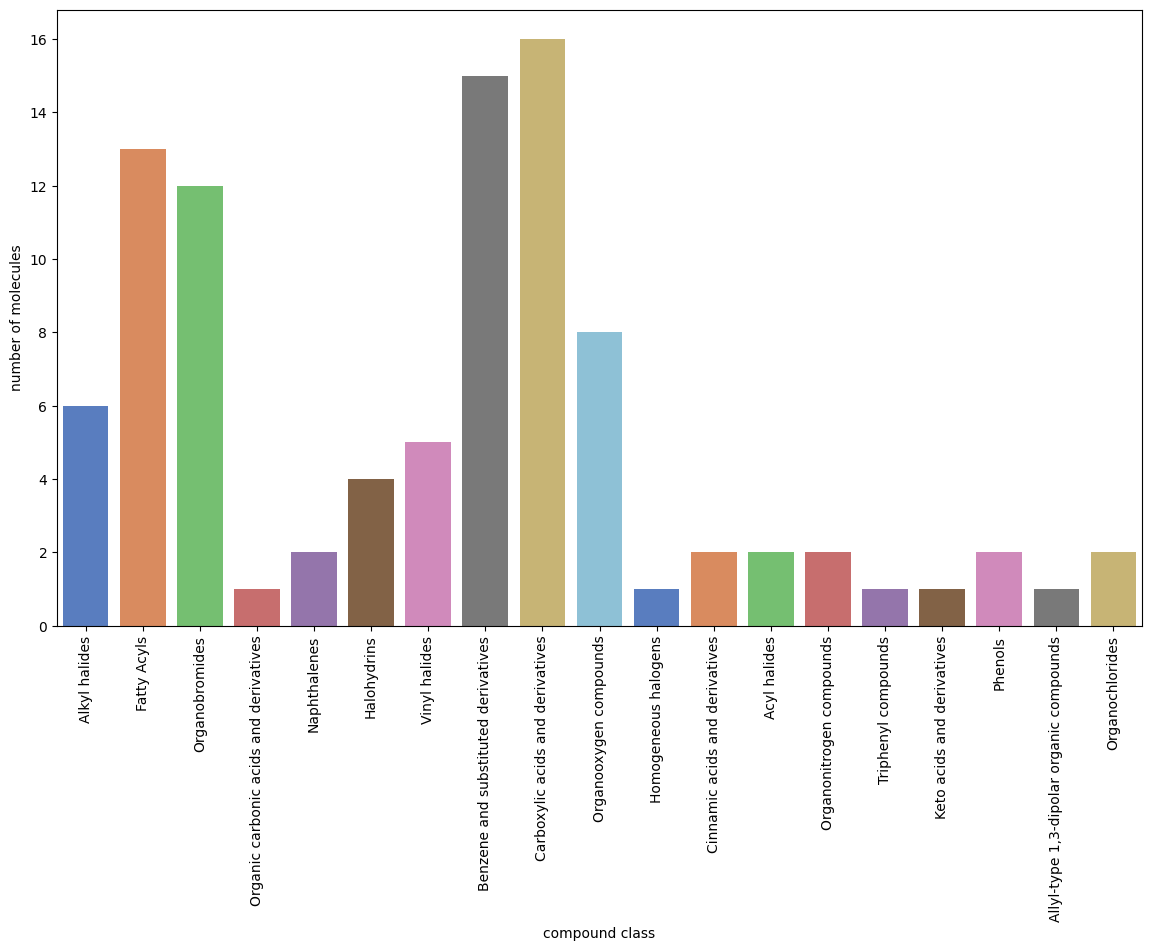

In [1]:
from dglchem.utils import num_chart
import json
import os
classes  = dict()
path = 'classyfire'
for file in os.listdir(path):
    file_path = os.path.join(path,file)
    try:
        class_name = json.load(open(file_path))['class']['name']
        if class_name in classes.keys():
            classes[class_name] += 1
        else:
            classes[class_name] = 1
    except:
        print(f'no class name in the first layer for file {file}')
num_chart(num_dict = classes, save_fig=True)

In [1]:
for i, idx in enumerate([9,8,7,6]):
    print(i, idx, sep=', ')

0, 9
1, 8
2, 7
3, 6


100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


[0]

In [1]:
from dglchem.utils import classyfire
from dglchem.utils import DataSet

data = DataSet(file_path='./data/processed/BradleyDoublePlus.pickle')
indices = classyfire(data.smiles[178:182], existing_log_file='analysis_results/recorded_SMILES.csv')

Loaded dataset.
Loaded existing log_file. Here is the data head:
  filename              smiles
0   0.json            CC(C)CCO
1   1.json  COC(=O)c1ccc(I)cc1
2   3.json               C=CCN
CC(C)CCO
check true
COC(=O)c1ccc(I)cc1
check true
N#CC=CC#N
C=CCN
check true


  0%|          | 0/1 [00:00<?, ?it/s]

KYPOHTVBFVELTG-UHFFFAOYSA-N
Failure to retrieve information for SMILE at index 2


100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

Some InChikeys were not available. Please check "Missing_ichikeys.txt" file.


In [1]:
from dglchem.datasets import BradleyDoublePlus
data = BradleyDoublePlus(only_organic=True, log=True)
data.save_dataset('BradleyDoubleGood')

SMILES [O-][N+]#N in index 1 does not contain at least one carbon and will be ignored.
SMILES FS(F)(=O)=O in index 2 does not contain at least one carbon and will be ignored.
SMILES BrBr in index 4 does not contain at least one carbon and will be ignored.
SMILES II in index 8 does not contain at least one carbon and will be ignored.
SMILES ClS(Cl)(=O)=O in index 79 does not contain at least one carbon and will be ignored.
SMILES B(OCC)(OCC)OCC in index 144 contains the atom B that is not permitted and will be ignored.
SMILES c1cccn1 in index 308 is not valid.
SMILES N#Cc3cncc3c1cccc2OC(F)(F)Oc12 in index 370 is not valid.
SMILES CC[Si](CC)(CC)CC in index 519 contains the atom Si that is not permitted and will be ignored.
SMILES CC[Si](CC)(Cl)Cl in index 541 contains the atom Si that is not permitted and will be ignored.
SMILES [SiH](Cl)(Cl)Cl in index 565 contains the atom Si that is not permitted and will be ignored.
SMILES [SiH](Cl)(Cl)Cl in index 565 does not contain at least one ca

In [1]:
from dglchem.utils import DataSet
data = DataSet('./data/processed/BradleyDoublePlus.pickle')
data = data[0]
print(data)
print(data.edge_index)

from dglchem.models.layers import DMPNN_t
layer = DMPNN_t(node_in_feats=len(data.edge_attr))
layer(data.x, data.edge_index, data.edge_attr)

Loaded dataset.
Data(x=[5, 42], edge_index=[2, 10], edge_attr=[10, 12], y=[1])
tensor([[0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
        [1, 0, 2, 4, 1, 3, 2, 4, 1, 3]])
init
x shape:  torch.Size([5, 42])
message
----------
current node: tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 1., 0., 0

RuntimeError: Expected index [10] to be smaller than self [5] apart from dimension 0 and to be smaller size than src [5]

In [9]:
from dglchem.utils import DataSet
data = DataSet('./data/processed/BradleyDoublePlus.pickle')
data = data[0]
x = data.x
index = data.edge_index
edges = data.edge_attr
print(edges)
print(index)
print(index[:,0])
print(edges[index[:,0]])

for i in range(len(index[0,:])):
    print(index[:,index[0,:]==i])


Loaded dataset.
tensor([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.]])
tensor([[0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
        [1, 0, 2, 4, 1, 3, 2, 4, 1, 3]])
tensor([0, 1])
tensor([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])
tensor([[0],
        [1]])
tensor([[1, 1, 1],
        [0, 2, 4]])
tensor([[2, 2],
        [1, 3]])
tensor([[3, 3],
        [2, 4]])
tensor([[4, 4],
        [1, 3]])
tensor([], size=(2, 0), d

In [15]:
import pandas as pd
data = pd.DataFrame({'filename':[], 'smiles':[]})
data = pd.concat([data, pd.DataFrame({'filename':['Jeff'], 'smiles':['test']})], ignore_index=True)
print(data)

  filename smiles
0     Jeff   test
